# Part I - Ford GoBike System Data Exploration
## by Okello Edward

## Introduction
Ford GoBike System Data includes information about individual rides made in a bike-sharing system covering the greater San Fransisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [39]:
# load the data into a dataframe
ride_data = pd.read_csv('fordgobike-tripdata.csv')

#### Assessing the Data

In [3]:
# The overview of the data
ride_data.info()
ride_data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No


In [4]:
# finding the number of missing values
ride_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### Quality Issues
<ul>
    <li>Some rows have missing data</li>
    <li>member_bith_year, start_time and end_time columns have wrong data types</li>
    <li>start_time and end_time columns contains more than one data (date, and time)</li>
</ul>

#### Data Cleaning

In [5]:
# Make a copy of the dataset before doing any cleaning activity
clean_ride_data = ride_data.copy()

#### Define: <strong>Drop rows that have missing values using pandas dropna() function.</strong>

#### Code

In [6]:
clean_ride_data = clean_ride_data.dropna()

#### Test

In [7]:
clean_ride_data.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### Define: <strong>Convert start_time and end_time columns to datetime using pandas' to_datetime() function. Convert member_birth_year to integer instead of float</strong>

#### Code

In [8]:
clean_ride_data.start_time = pd.to_datetime(clean_ride_data.start_time)
clean_ride_data.end_time = pd.to_datetime(clean_ride_data.end_time)
clean_ride_data.member_birth_year = clean_ride_data.member_birth_year.astype(int)

#### Test

In [9]:
clean_ride_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

#### Define: <strong>Extract month, day, and hour information from start_time and end_time columns.</strong>

#### Code

In [10]:
# using start_time
clean_ride_data['start_month'] = clean_ride_data.start_time.dt.strftime('%b')
clean_ride_data['start_day'] = clean_ride_data.start_time.dt.strftime('%a')
clean_ride_data['start_hour'] = clean_ride_data.start_time.map(lambda x: x.hour)

# using end_time
clean_ride_data['end_month'] = clean_ride_data.end_time.dt.strftime('%b')
clean_ride_data['end_day'] = clean_ride_data.end_time.dt.strftime('%a')
clean_ride_data['end_hour'] = clean_ride_data.end_time.map(lambda x: x.hour)


In [11]:
# convert duration to minutes
clean_ride_data['duration_min'] = clean_ride_data.duration_sec.map(lambda x: x/60)

#### Test

In [12]:
clean_ride_data.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,end_month,end_day,end_hour,duration_min
139075,323,2019-02-07 22:46:38.504,2019-02-07 22:52:01.732,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,26.0,1st St at Folsom St,37.787290,...,1986,Male,No,Feb,Thu,22,Feb,Thu,22,5.383333
96818,317,2019-02-15 09:45:34.249,2019-02-15 09:50:52.179,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,64.0,5th St at Brannan St,37.776754,...,1989,Male,No,Feb,Fri,9,Feb,Fri,9,5.283333
67462,622,2019-02-20 07:51:12.395,2019-02-20 08:01:34.712,76.0,McCoppin St at Valencia St,37.771662,-122.422423,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,1991,Male,No,Feb,Wed,7,Feb,Wed,8,10.366667
111575,457,2019-02-12 16:58:02.265,2019-02-12 17:05:39.730,290.0,George St at 1st St,37.347732,-121.899464,341.0,Fountain Alley at S 2nd St,37.336188,...,1987,Female,No,Feb,Tue,16,Feb,Tue,17,7.616667
57661,846,2019-02-21 07:58:33.332,2019-02-21 08:12:39.896,160.0,West Oakland BART Station,37.805318,-122.294837,153.0,59th St at Horton St,37.840945,...,1984,Female,No,Feb,Thu,7,Feb,Thu,8,14.100000


In [13]:
# convert start_day to ordinal values
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
days_order = pd.api.types.CategoricalDtype(ordered=True, categories = days)
clean_ride_data['start_day'] = clean_ride_data['start_day'].astype(days_order)

In [14]:
clean_ride_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [15]:
# calculate te age of rides based on birth_year
clean_ride_data['rider_age'] = 2019 - clean_ride_data['member_birth_year']

In [16]:
clean_ride_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,end_month,end_day,end_hour,duration_min,rider_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,Feb,Thu,17,Mar,Fri,8,869.750000,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,Feb,Thu,12,Mar,Fri,5,1030.900000,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,Feb,Thu,17,Mar,Fri,4,608.166667,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,Feb,Thu,23,Mar,Fri,0,26.416667,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,Feb,Thu,23,Mar,Fri,0,29.883333,60


In [17]:
# drop start_time, end_time and duration_sec columns as we nolonger need them
clean_ride_data.drop(['start_time', 'end_time', 'duration_sec'], axis=1, inplace=True)

In [18]:
clean_ride_data.head(2)

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,...,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,end_month,end_day,end_hour,duration_min,rider_age
0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,...,Male,No,Feb,Thu,17,Mar,Fri,8,869.75,35
2,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,...,Male,No,Feb,Thu,12,Mar,Fri,5,1030.90,47


In [19]:
ride_data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### What is the structure of your dataset?

> There are 183412 entries in the dataset with 16 features (duration_sec,
 start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, ike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).
  There are numeric types (2 integer types, and 7 float types),and 7 object data types.
 

### What is/are the main feature(s) of interest in your dataset?

> <ul>
    <li>To figure out how different features affect bike distribution</li>
    <li>I am interested in finding out how user type affects rides</li>
  </ul>


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I intend to use start_month, start_day, start_hour, end_month, end_day and end_hour to figure out which time of the day are the bikes mostly used. I also plen to use start_station_name and end_station_name to know the areas where  bikes are mostly used. In addition, I will use duration_min and user_type to find out which types of users have most rides.


## Univariate Exploration




#### <strong>Which day had the highest number of rides?</strong>

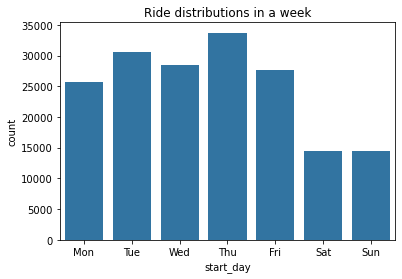

In [20]:
# Visualizing number of rides per month
sb.countplot(data = clean_ride_data, x = 'start_day', color=sb.color_palette()[0]).set(title = 'Ride distributions in a week');


<strong>Observation</strong>
> Thursday has the highest number of riders followed by Tuesday

#### <strong>At what time do most rides happen?</strong>

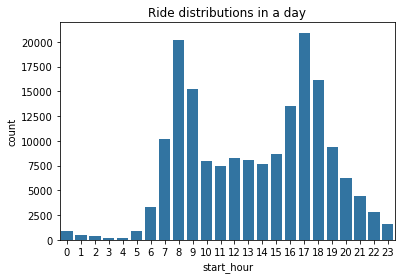

In [21]:
# Visualizing ride distribution per day
sb.countplot(data = clean_ride_data, x = 'start_hour', color=sb.color_palette()[0]).set(title = 'Ride distributions in a day');


<strong>Observation</strong>
> The highest number of rides occur at 0800 Hours and 1700 Hours. This could indicate that most riders use the bikes in the morning to work and in the evening from work.

#### <strong>What is the user types of most riders?</strong>

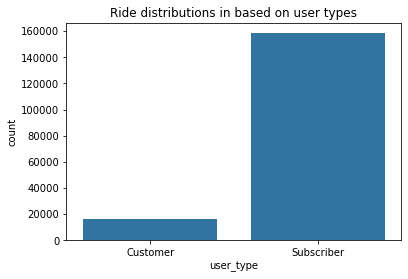

In [22]:
# Visualizing ride distribution based on user types
sb.countplot(data = clean_ride_data, x = 'user_type', color=sb.color_palette()[0]).set(title = 'Ride distributions in based on user types');


<strong>Observation</strong>
> Most riders are suscribers and not customers

#### <strong>Are there more Male or Female riders?</strong>

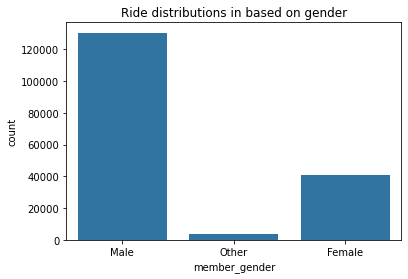

In [23]:
# Visualizing ride distribution based on gender
sb.countplot(data = clean_ride_data, x = 'member_gender', color=sb.color_palette()[0]).set(title = 'Ride distributions in based on gender');


<strong>Observation</strong>
> Most of the riders are Male

#### <strong>Where do most rides start and end?</strong>

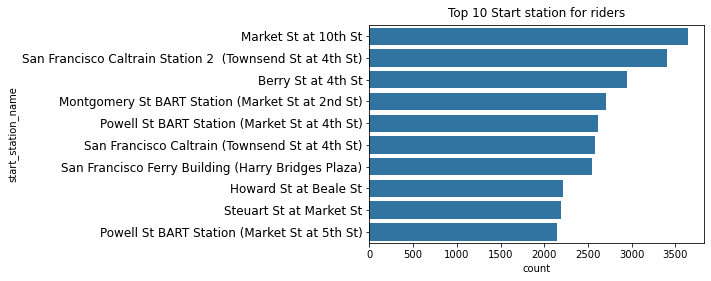

In [24]:
# Visualizing ride start stations
start_color = sb.color_palette()[0]
sb.countplot(data = clean_ride_data, y= 'start_station_name', color = start_color, order = clean_ride_data.start_station_name.value_counts().iloc[:10].index)
plt.tick_params(axis = 'y',which = 'major',labelsize = 12)
plt.title('Top 10 Start station for riders', y = 1.01);

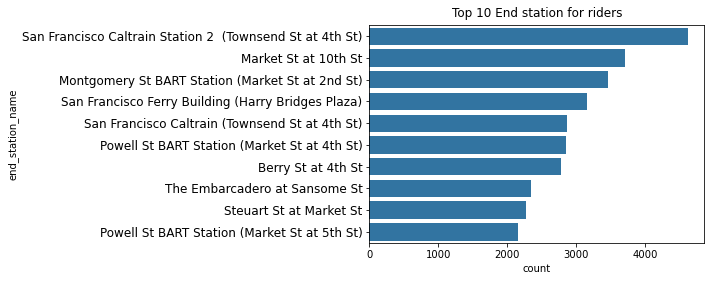

In [25]:
# Visualizing ride end stations
start_color = sb.color_palette()[0]
sb.countplot(data = clean_ride_data, y= 'end_station_name', color = start_color, order = clean_ride_data.end_station_name.value_counts().iloc[:10].index)
plt.tick_params(axis = 'y',which = 'major',labelsize = 12)
plt.title('Top 10 End station for riders', y = 1.01);


<strong>Observation</strong>
> Most riders are from Market St at 10th St and San Francisco Caltrain Station 2 (Townsend St at 4th St)

In [26]:
# Investigating riders age
clean_ride_data.rider_age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: rider_age, dtype: float64

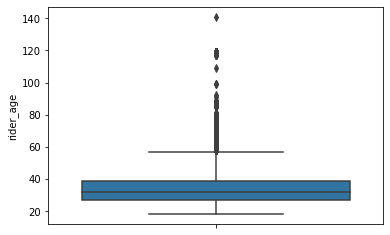

In [27]:
# Visualizing user ages
sb.boxplot(data = clean_ride_data, y = 'rider_age');

> Riders ages contains outliers and are not well distributed. Thus we need to calculate the Upper Wisker Bound

IQR = Q3 - Q1
Upper Wisker Bound = 1.5 * IQR + Q3 =  1.5 * (39.0 - 27.0) + 39.0 = 57.0

In [28]:
# use only records in which the rider's age is below 61
clean_ride_data = clean_ride_data[clean_ride_data['rider_age'] <= 60]


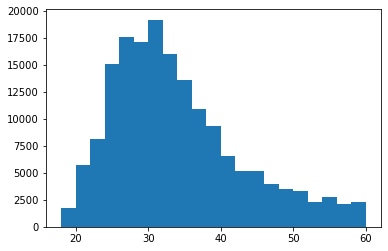

In [29]:
binsize = 2
bins = np.arange(18, clean_ride_data.rider_age.max()+binsize, binsize)
plt.hist(data = clean_ride_data, x = 'rider_age', bins = bins);

<strong>Observation</strong>
> Most riders are between the age of 25 and 35.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was unusualpoint in the age, year of birth, start_time and end time. I did data transformation to convert the columns to the right data types and to remove outliers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, there were unusual distributions on the riders ages. The maximum age was 141 which is unusual. I tidy up the data to remove the outliers, and calculated the upper wisker bound to get the reasonable maximum age that I used for visualizations. Removing the outliers makes the data tidy and easier to analyze, and visualize.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### <strong>Distribution of rides in a week between subscribers and customers?</strong>

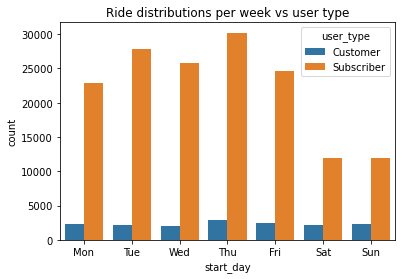

In [30]:
sb.countplot(data = clean_ride_data, x = 'start_day', hue = 'user_type', order=days).set(title = 'Ride distributions per week vs user type');


<strong>Observation</strong>
> Subscribers are the highest riders every day with the highest day being Thursday. Customers distribution is nearly constant at around 2500 every day.

#### <strong>Distribution of rides in a day between subscribers and customers?</strong>

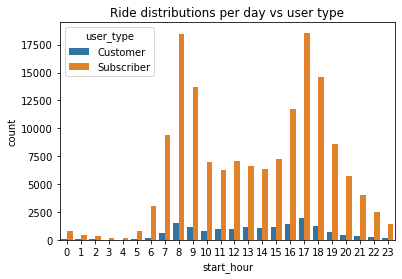

In [31]:
sb.countplot(data = clean_ride_data, x = 'start_hour', hue = 'user_type').set(title = 'Ride distributions per day vs user type');

<strong>Observation</strong>
> The distribution of rides in a dayfollow a similar pattern between customers and subscribers, both of which 0800 Horus and 1700 Hours had the highest rides.

#### <strong>Distribution of riders age and ride duration</strong>

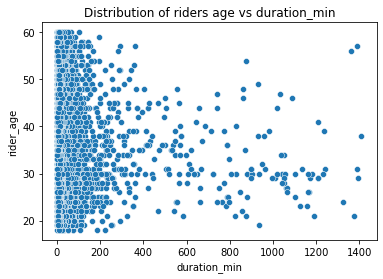

In [32]:
# duration_hour = clean_ride_data[clean_ride_data['duration_min'] / 60]
sb.scatterplot(data = clean_ride_data, y = 'rider_age', x = 'duration_min').set(title = 'Distribution of riders age vs duration_min');


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that most riders have an average age of 30, with the majority of rides taking about 10 minutes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Ride distribution is similar among subscribers and customers even during weekends. I expected  more customer riders than subscriber riders during weekends.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### <strong>Distribution of ride duration for different gender</strong>

In [33]:
# compute the logarithm of price to make multivariate plotting easier
def log_translation(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

clean_ride_data['log_duration'] = clean_ride_data['duration_min'].apply(log_translation)

In [34]:
def hist_grid(x, y, **kwargs):
    palette = kwargs.pop('color');
    bins_x = np.arange(18, clean_ride_data['rider_age'].max()+2, 2);
    bins_y = np.arange(0, 2, 0.1);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5);
    plt.yticks(log_translation(np.array([1, 2, 5, 10, 20, 50, 100])),
               [1, 2, 5, 10, 20, 50, 100]);

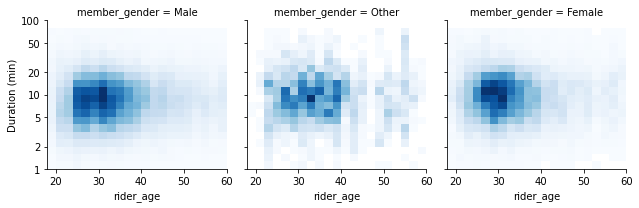

In [35]:
o = sb.FacetGrid(data = clean_ride_data, col = 'member_gender', height = 3);
o.map(hist_grid, 'rider_age', 'log_duration', color = 'Blues');
o.set_xlabels('rider_age');
o.set_ylabels('Duration (min)');

<strong>Observation</strong>
> On average, female riders apper to ride longer than male riders

#### <strong>Distribution of ride duration for different user types</strong>

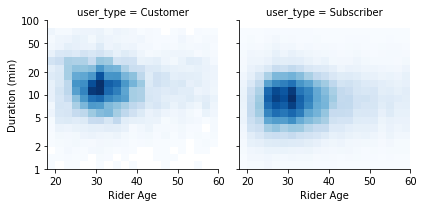

In [36]:
o = sb.FacetGrid(data = clean_ride_data, col = 'user_type', height = 3);
o.map(hist_grid, 'rider_age', 'log_duration', color = 'Blues');
o.set_xlabels('Rider Age');
o.set_ylabels('Duration (min)');

<strong>Observation</strong>
> On average, customers ride for longer duration compared to subscribers

#### <strong>Distribution of ride duration for different days</strong>

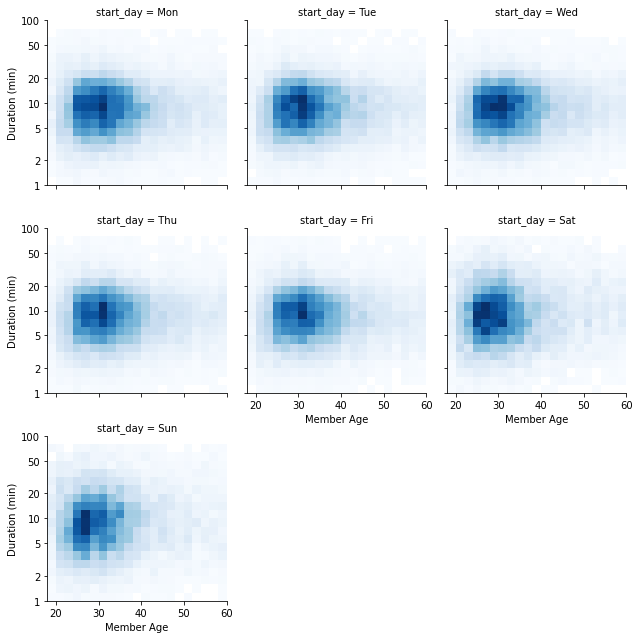

In [37]:
o = sb.FacetGrid(data = clean_ride_data, col = 'start_day', col_wrap = 3, height = 3);
o.map(hist_grid, 'rider_age', 'log_duration', color = 'Blues');
o.set_xlabels('Member Age');
o.set_ylabels('Duration (min)');

<strong>Observation</strong>
> There appears to be longer ride durations on weekend compared to weekdays.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> <ul>
    <li>The relationships observed in this part showed that people ride for longer hours during weekend. During this duration, most riders are customers.</li>
    <li>During this investigation, rider_age strngthened an earlier conclussion that most riders are aged between 25 and 35
  </ul>

### Were there any interesting or surprising interactions between features?

> <ul>
    <li>Customers ride for longer duration compared to subscribers</li>
    <li>Most rides happen during the morning and evening hours; when people are reporting to and leaving work</li>
    <li>Bike rides have longer durations during weekends than weekdays as expected</li>
    <li>The avarage age of riders is between 25 and 35</li>
  </ul>

## Conclusions
> In conclusion, most riders are subscribers who are of the working class. This is because, most rides occur during office hours during business days. In addition, most riders are below 40 years old.


In [38]:
# saving the data
clean_ride_data.to_csv('cleaned_ride_data.csv')